In [1]:
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras import metrics
import matplotlib.pyplot as plt

In [2]:
train_path = '../chest_xray/train'
test_path = '../chest_xray/test'
val_path = '../chest_xray/val'

train_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

train_ds = train_generator.flow_from_directory(
    train_path,
    target_size=(256,256),
    class_mode='binary'
)

Found 4175 images belonging to 2 classes.


In [3]:
val_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

val_ds = val_generator.flow_from_directory(
    val_path,
    target_size=(256,256),
    class_mode='binary'
)

Found 1057 images belonging to 2 classes.


In [4]:
test_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

test_ds = test_generator.flow_from_directory(
    test_path,
    target_size=(256,256),
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


In [5]:
model = models.Sequential()

model.add(layers.Conv2D(32, (1, 1), activation='relu',
                        input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
checkpoint = keras.callbacks.ModelCheckpoint(
    monitor='val_loss',
    filepath='save_data/01_basic_model.hdf5',
    save_best_only=True,
    verbose=0
)

callbacks = [checkpoint]

In [7]:
use_metrics = [metrics.BinaryAccuracy(),\
                metrics.Precision(),\
                metrics.Recall()]

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.Adam(),
    metrics=[use_metrics]
)

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      2112      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 262144)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               67109120  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2

In [8]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=callbacks
)

model = keras.models.load_model('save_data/01_basic_model.hdf5')

Epoch 1/20
131/131 [==============================] - 68s 518ms/step - loss: 1.7019 - binary_accuracy: 0.8472 - precision: 0.8878 - recall: 0.9090 - val_loss: 0.1744 - val_binary_accuracy: 0.9262 - val_precision: 0.9273 - val_recall: 0.9770
Epoch 2/20
131/131 [==============================] - 66s 505ms/step - loss: 0.1216 - binary_accuracy: 0.9576 - precision: 0.9665 - recall: 0.9768 - val_loss: 0.1269 - val_binary_accuracy: 0.9489 - val_precision: 0.9620 - val_recall: 0.9693
Epoch 3/20
131/131 [==============================] - 66s 505ms/step - loss: 0.0941 - binary_accuracy: 0.9657 - precision: 0.9731 - recall: 0.9810 - val_loss: 0.1255 - val_binary_accuracy: 0.9461 - val_precision: 0.9814 - val_recall: 0.9451
Epoch 4/20
131/131 [==============================] - 66s 507ms/step - loss: 0.0837 - binary_accuracy: 0.9691 - precision: 0.9772 - recall: 0.9813 - val_loss: 0.0999 - val_binary_accuracy: 0.9518 - val_precision: 0.9778 - val_recall: 0.9566
Epoch 5/20
131/131 [================

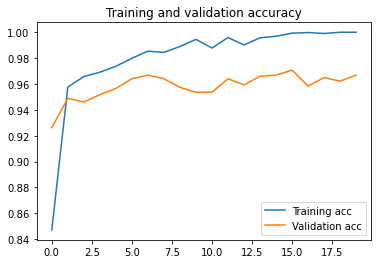

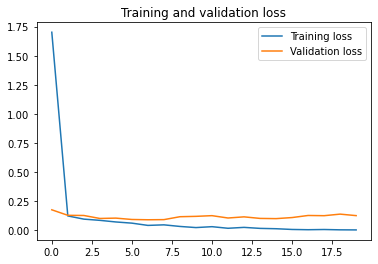

In [9]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [10]:
train_res = model.evaluate(train_ds)

131/131 [==============================] - 30s 229ms/step - loss: 0.0338 - binary_accuracy: 0.9880 - precision: 0.9872 - recall: 0.9968


In [11]:
val_res = model.evaluate(val_ds)

34/34 [==============================] - 7s 217ms/step - loss: 0.0886 - binary_accuracy: 0.9669 - precision: 0.9675 - recall: 0.9885


In [12]:
test_res = model.evaluate(test_ds)

20/20 [==============================] - 4s 183ms/step - loss: 1.3210 - binary_accuracy: 0.7276 - precision: 0.6978 - recall: 0.9949
